In [1]:
from __future__ import print_function

import gspread
import pygsheets
from oauth2client.service_account import ServiceAccountCredentials

%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
from datetime import time, date, datetime, timedelta

In [2]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = 'service_key.json'

gc = pygsheets.authorize(service_file=SERVICE_ACCOUNT_FILE)

<IPython.core.display.Javascript object>


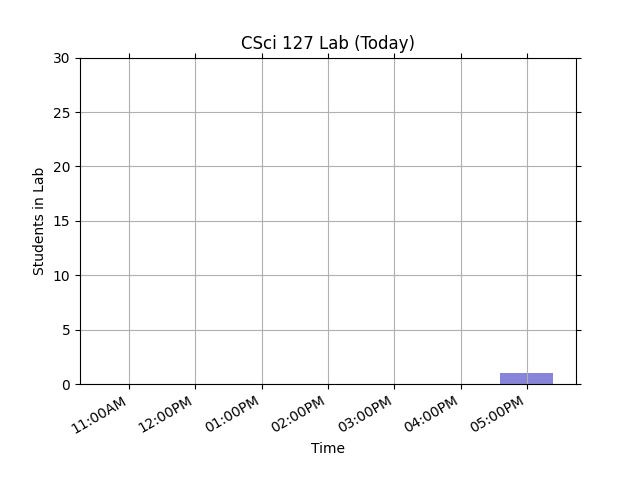

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def daily(i):
    # Get data from sheets & turn into dataframe
    signinSheet = gc.open('CSci 127 Tutoring Sign-In (Responses)').sheet1
    signin = pd.DataFrame.from_dict(signinSheet.get_all_records())

    signoutSheet = gc.open('CSci 127 Tutoring Sign Out (Responses)').sheet1
    signout = pd.DataFrame.from_dict(signoutSheet.get_all_records())


    # split timestamp into date and time column
    signin[['Date', 'Time']] = signin['Timestamp'].str.split(expand=True) 
    signout[['Date', 'Time']] = signout['Timestamp'].str.split(expand=True) 

    # Limit data to today only 
    today = '{dt.month}/{dt.day}/{dt.year}'.format(dt = datetime.now())
    today_lims = datetime.now().strftime('%Y-%m-%d')


    today_signin = signin[signin['Date'] == today] 
    today_signout = signout[signout['Date'] == today]

    LAB_CAPACITY = 30


    lab_hours = [time(hour=i).strftime("%I:%M%p") for i in range(11, 18)]
    
    
    students = buildData(today_signin, today_signout)
    students = pd.DataFrame.from_dict(students, orient = 'index', columns = ['Number Students'])

    students['Time'] = lab_hours
    print(students)
    
    ax.clear()
    
    ax.bar(students['Time'], students['Number Students'], color = '#8784d9')                
    plt.grid() 

    ax.set(xlabel='Time', ylabel='Students in Lab',
             ylim = (0, LAB_CAPACITY),
             xticks = (range(len(lab_hours))),
             xticklabels = lab_hours,
             title = 'CSci 127 Lab (Today)'
            )
    
    fig.autofmt_xdate()
    

def buildData(signin, signout):
    hours = [i for i in range(11, 18)]
    students = {}
    for i in hours:
        students.update({str(i): 0})
    
    curr = 0
    for t in signin['Time']:
        curr += 1
        key = str(t[:2])
        students[key] = curr
        
    for t in signout['Time']:
        key = str(t[:2])
        students[key] -= 1

    return students
        
ani = animation.FuncAnimation(fig, daily, interval=1000)
plt.show()